In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import ResNet50
sys.version

Using TensorFlow backend.


'3.6.9 (default, Nov  7 2019, 10:44:02) \n[GCC 8.3.0]'

In [0]:
!unzip -q "drive/My Drive/test fish/Dataset.zip"

In [0]:
categori = os.listdir(os.path.join(os.getcwd(),"Dataset"))

In [0]:
base_path = "Dataset"
categories = sorted(categori)

In [0]:
print(categories)

['Angler Frog', 'Anthias', 'Banggai Cardinal', 'Baracuda', 'Barred Thicklip', 'Bawal', 'Belanak', 'Bibir Merah', 'Black Saddled Toby', 'Blackbar Soldierfish', 'Blackbar chromis', 'Blackghost', 'Blue Devil', 'Brown Tangfish', 'Buntal', 'Chelmon Rostratus', 'Chevron Butterflyfish', 'Dottyback', 'Foureye Butterflyfish', 'Giru (Nemo)', 'Hiu Paus', 'Hiu Putih', 'Indigo Hamlet', 'Julung-Julung', 'Kakaktua', 'Kakap-Merah', 'Kerapu', 'King Anglefish', 'Kuwe Gerong', 'Layur', 'Lemadeng', 'Lemon', 'Lepu Ayam', 'Lumba-Lumba', 'Mandarin', 'Marlin', 'Moorish Idol', 'Napoleon', 'Neoniphon Sammara', 'Oval Butterflyfish', 'Pari', 'Paus Pembunuh', 'Paus Sirip', 'Rainbow', 'Terbang', 'Triggerfish', 'Tuna', 'Vanikoro Sweeper', 'Yellow Tangfish', 'Yellow Watchman Godies']


In [0]:
fnames = []
for category in categories:
    fish_folder = os.path.join(base_path, category)
    file_names = os.listdir(fish_folder)
    full_path = [os.path.join(fish_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

In [0]:
images = []
for names in fnames:
    one_category_images = [cv2.imread(name) for name in names if (cv2.imread(name)) is not None]
    images.append(one_category_images)

In [0]:
print('Jumlah Gambar Setiap Kategori:', [len(f) for f in images])

Jumlah Gambar Setiap Kategori: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


In [0]:
for i,imgs in enumerate(images):
    shapes = [img.shape for img in imgs]
    widths = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d is the min shape for %s' % (np.min(widths), np.min(heights), categories[i]))

169,220 is the min shape for Angler Frog
168,224 is the min shape for Anthias
146,220 is the min shape for Banggai Cardinal
129,200 is the min shape for Baracuda
77,75 is the min shape for Barred Thicklip
156,160 is the min shape for Bawal
124,275 is the min shape for Belanak
183,275 is the min shape for Bibir Merah
66,68 is the min shape for Black Saddled Toby
129,200 is the min shape for Blackbar Soldierfish
183,208 is the min shape for Blackbar chromis
163,250 is the min shape for Blackghost
160,295 is the min shape for Blue Devil
62,71 is the min shape for Brown Tangfish
184,236 is the min shape for Buntal
183,242 is the min shape for Chelmon Rostratus
120,200 is the min shape for Chevron Butterflyfish
145,211 is the min shape for Dottyback
157,168 is the min shape for Foureye Butterflyfish
182,183 is the min shape for Giru (Nemo)
229,350 is the min shape for Hiu Paus
165,200 is the min shape for Hiu Putih
140,211 is the min shape for Indigo Hamlet
176,259 is the min shape for Julu

In [0]:
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

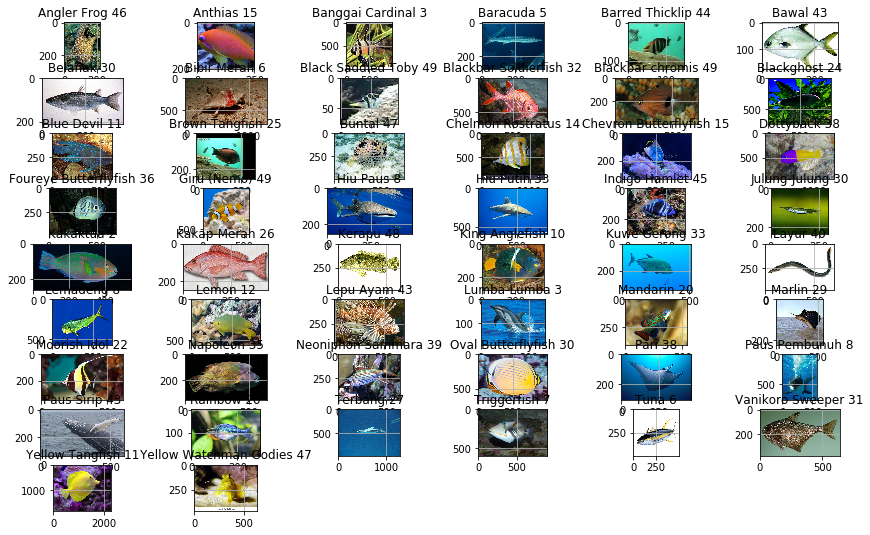

In [0]:
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    plt.subplot(10,6,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(cvtRGB(imgs[idx]))
    plt.grid('off')
    plt.title(categories[i]+' '+str(idx))
plt.show()

(600, 896, 3)
(256, 256, 3)


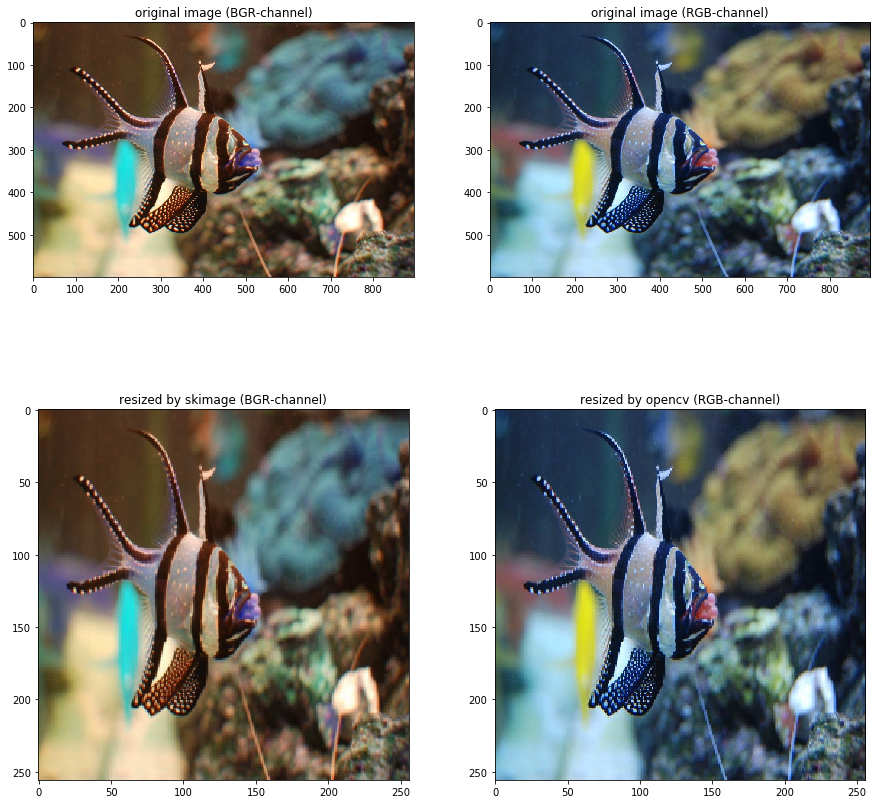

In [0]:
img_width, img_height = 256, 256

img = images[2][2]
print(img.shape)
resized_img = resize(img, (img_width, img_height, 3))
resized_img2 = cv2.resize(img,(img_width, img_height), interpolation = cv2.INTER_CUBIC)
print(resized_img.shape)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('original image (BGR-channel)')
plt.grid(False)
plt.imshow(img)
plt.subplot(2,2,2)
plt.title('original image (RGB-channel)')
plt.grid(False)
plt.imshow(cvtRGB(img))
plt.subplot(2,2,3)
plt.title('resized by skimage (BGR-channel)')
plt.grid(False)
plt.imshow((resized_img))
plt.subplot(2,2,4)
plt.title('resized by opencv (RGB-channel)')
plt.grid(False)
plt.imshow(cvtRGB(resized_img2))
plt.show()

In [0]:
resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC) for img in imgs])

In [0]:
train_images = []
val_images = []
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)
    train_images.append(train)
    val_images.append(test)

In [0]:
len_train_images = [len(imgs) for imgs in train_images]
print(len_train_images)
print('Jumlah Total Data Training:', np.sum(len_train_images))
train_categories = np.zeros((np.sum(len_train_images)), dtype='uint8')
for i in range(50):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
        
len_val_images = [len(imgs) for imgs in val_images]
print(len_val_images)
print('Jumlah Total Data Validation:', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(50):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Jumlah Total Data Training: 2000
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Jumlah Total Data Validation: 500


In [0]:
tmp_train_imgs = []
tmp_val_imgs = []
for imgs in train_images:
    tmp_train_imgs += imgs
for imgs in val_images:
    tmp_val_imgs += imgs
train_images = np.array(tmp_train_imgs)
val_images = np.array(tmp_val_imgs)

In [0]:
print('Before converting')
print('train data:', train_images.shape)
print('train labels:', train_categories.shape)

train_data = train_images.astype('float32')
val_data = val_images.astype('float32')
train_labels = to_categorical(train_categories, len(categories))
val_labels = to_categorical(val_categories, len(categories))
print()
print('After converting')
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)

Before converting
train data: (2000, 256, 256, 3)
train labels: (2000,)

After converting
train data: (2000, 256, 256, 3)
train labels: (2000, 50)


In [0]:
train_data = train_data[:2000]
train_labels = train_labels[:2000]
val_data = val_data[:500]
val_labels = val_labels[:500]
print('shape of train data:', train_data.shape)
print('shape of train labels:', train_labels.shape)
print('shape of val data:', val_data.shape)
print('shape of val labels:', val_labels.shape)

shape of train data: (2000, 256, 256, 3)
shape of train labels: (2000, 50)
shape of val data: (500, 256, 256, 3)
shape of val labels: (500, 50)


In [0]:
def create_model_from_ResNet50():

    model = Sequential()
    model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet', input_tensor=None, input_shape=(256, 256, 3)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(len(categories), activation='softmax'))

    optimizer = Adam(learning_rate=0.0001)
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    
    return model

In [0]:
model_ResNet50 = create_model_from_ResNet50()
model_ResNet50.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94773248/94765736 [==============================] - 8s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)  

In [0]:
batch_size = 32
epochs = 200

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
)


train_generator = train_datagen.flow(
    train_data,
    train_labels,
    batch_size=batch_size
)

val_generator = val_datagen.flow(
    val_data,
    val_labels,
    batch_size=batch_size
)

In [0]:
start = time.time()

model_ResNet50_info = model_ResNet50.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data)/batch_size, 
    epochs=epochs, 
    validation_steps=len(val_data)/batch_size,
    validation_data=val_generator, 
    verbose=2
)

end = time.time()
duration = end - start
print ('\n model_ResNet50 Memerlukan Waktu %0.2f Detik (%0.1f Menit) Dengan Menggunakan %d Epochs'%(duration, duration/60, epochs) )

Epoch 1/200
Epoch 1/200
63/62 - 61s - loss: 4.0914 - acc: 0.0740 - val_loss: 4.2160 - val_acc: 0.0200
Epoch 2/200
Epoch 1/200
63/62 - 35s - loss: 2.5734 - acc: 0.3345 - val_loss: 4.1554 - val_acc: 0.0400
Epoch 3/200
Epoch 1/200
63/62 - 37s - loss: 1.5802 - acc: 0.6145 - val_loss: 4.1301 - val_acc: 0.0280
Epoch 4/200
Epoch 1/200
63/62 - 37s - loss: 1.0601 - acc: 0.7555 - val_loss: 4.1162 - val_acc: 0.0240
Epoch 5/200
Epoch 1/200
63/62 - 37s - loss: 0.7181 - acc: 0.8410 - val_loss: 4.0750 - val_acc: 0.0220
Epoch 6/200
Epoch 1/200
63/62 - 36s - loss: 0.5405 - acc: 0.8865 - val_loss: 3.9132 - val_acc: 0.0700
Epoch 7/200
Epoch 1/200
63/62 - 37s - loss: 0.4541 - acc: 0.8980 - val_loss: 3.6941 - val_acc: 0.1320
Epoch 8/200
Epoch 1/200
63/62 - 37s - loss: 0.3126 - acc: 0.9425 - val_loss: 3.2913 - val_acc: 0.1960
Epoch 9/200
Epoch 1/200
63/62 - 37s - loss: 0.2862 - acc: 0.9385 - val_loss: 2.6707 - val_acc: 0.3600
Epoch 10/200
Epoch 1/200
63/62 - 37s - loss: 0.2283 - acc: 0.9595 - val_loss: 2.18

In [0]:
def return_name(label_arr):
  idx = np.where(label_arr == 1)
  return idx[0][0]

In [0]:
def plot_model_history(model_name, history, epochs):
  
  print(model_name)
  plt.figure(figsize=(15, 5))
  
  plt.subplot(1, 2 ,1)
  plt.plot(np.arange(0, len(history['acc'])), history['acc'], 'r')
  plt.plot(np.arange(1, len(history['val_acc'])+1), history['val_acc'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Accuracy vs. Validation Accuracy')
  plt.xlabel('Jumlah Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'validation'], loc='best')
  
  plt.subplot(1, 2, 2)
  plt.plot(np.arange(1, len(history['loss'])+1), history['loss'], 'r')
  plt.plot(np.arange(1, len(history['val_loss'])+1), history['val_loss'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Loss vs. Validation Loss')
  plt.xlabel('Jumlah Epoch')
  plt.ylabel('Loss')
  plt.legend(['train', 'validation'], loc='best')
  
  
  plt.show()

model_ResNet50


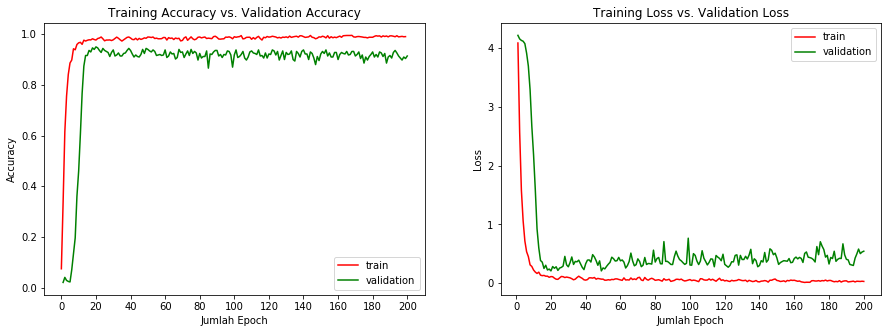

In [0]:
plot_model_history('model_ResNet50', model_ResNet50_info.history, epochs)

In [0]:
model_ResNet50.save('drive/My Drive/test fish/ResNet50/256/ResNet50_200_epochs.h5')

In [0]:
def predict_one_image(img, model):
  img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
  img = np.reshape(img, (1, img_width, img_height, 3))
  img = img/255.
  pred = model.predict(img)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)

In [0]:
!unzip -q "drive/My Drive/test fish/datauji.zip"

Prediksi Ikan : Bawal %


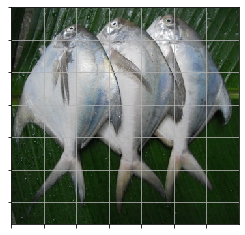


 Resnet50 memerlukan waktu pengujian 1.81 Detik 


In [0]:
start = time.time()

test_img = cv2.imread('datauji/bawal/3.jpg')
pred, _ = predict_one_image(test_img, model_ResNet50)
print('Prediksi Ikan : %s %%' % (categories[pred]))
# print('Ciri-ciri : %s %%' % (deskripsi[categories[pred]]))
_, ax = plt.subplots(1)
plt.imshow(cvtRGB(test_img))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.grid('off')
plt.show()

end = time.time()
duration = end - start

print('\n Resnet50 memerlukan waktu pengujian %0.2f Detik '%(duration))

In [0]:
def predict_val(val_data, model):
  val_input = np.reshape(val_data, (1, img_width, img_height, 3))
  val_input = val_input/255.
  pred = model.predict(val_input)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)

Model trained from ResNet-50
True: Moorish Idol || Predict: Moorish Idol 100%
True: Layur || Predict: Layur 85%
True: King Anglefish || Predict: King Anglefish 100%
True: Moorish Idol || Predict: Moorish Idol 100%
True: Foureye Butterflyfish || Predict: Foureye Butterflyfish 100%
True: Lemon || Predict: Barred Thicklip 55%
True: Kakaktua || Predict: Kakaktua 100%
True: Lepu Ayam || Predict: Lepu Ayam 100%
True: Chevron Butterflyfish || Predict: Chevron Butterflyfish 100%
True: Chevron Butterflyfish || Predict: Chevron Butterflyfish 100%
True: Kuwe Gerong || Predict: Kuwe Gerong 99%
True: Yellow Tangfish || Predict: Yellow Tangfish 100%
True: Rainbow || Predict: Rainbow 100%
True: Paus Sirip || Predict: Paus Sirip 100%
True: Pari || Predict: Pari 95%
True: Layur || Predict: Bawal 81%
True: Giru (Nemo) || Predict: Giru (Nemo) 100%
True: Rainbow || Predict: Rainbow 100%
True: Blue Devil || Predict: Blue Devil 100%
True: Buntal || Predict: Buntal 100%
True: Angler Frog || Predict: Angler F

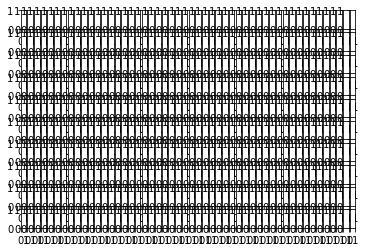

In [0]:
print("Model trained from ResNet-50")

for i in range(500):
  
    idx = np.random.randint(500)
  
    ax = plt.subplot(10,50,i+1)
    # plt.imshow(cvtRGB(val_data.astype('uint8')[idx]))
    category_idx = return_name(val_labels[idx])

    pred, prob = predict_val(val_data[idx], model_ResNet50)
    print('True: %s || Predict: %s %d%%' % (categories[category_idx], categories[pred], round(prob, 2)*100))